# YAPAY ZEKA DERSİNDE ÖĞRENCİ BAŞARISI ANALİZİ 
### 1. Projenin Amacı
Bu çalışmanın amacı, Universiti Teknologi Malaysia (UTM) bünyesinde yürütülen bir **Yapay Zeka (YZ)** dersine katılan öğrencilerin akademik performanslarını etkileyen faktörleri incelemektir. Veri seti üzerinde **Keşifçi Veri Analizi (EDA)** yapılarak; öğrencilerin Quiz, Ödev ve Sınav notları arasındaki ilişkiler ortaya konulacak, eksik veriler kontrol edilecek ve başarı dağılımları görselleştirilecektir.

### 2. Veri Seti Hakkında (Data Description)
Bu çalışmada kullanılan veri seti, **Mendeley Data** akademik veri havuzundan temin edilmiştir.
* **Veri Seti Adı:** Student Performance Dataset in AI Course
* **Kaynak:** Mendeley Data (Elsevier)
* **Yayın Tarihi:**  15 Aralık 2025(Version 3 - Güncel)
* **Format:** Tabular (.csv)
* **İçerik:** 520öğrenciye ait demografik bilgiler ve notlandırma verileri.
* **Orijinal Link:** [Mendeley Data Linki](https://data.mendeley.com/datasets/vzfyk22fhn/3)


### 1.Kütüphanelerin Yüklenmesi ve Veri Setinin Okunması

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot') 

print("Kütüphaneler başarıyla yüklendi.")


df = pd.read_csv("/kaggle/input/student-performance-dataset-in-ai-course/AI course Dataset.csv")
df.head()

Kütüphaneler başarıyla yüklendi.


,Student Id,Quiz_1,Midterm_1,Assignment_1,Assignment_2,Assignment_3,Project,Presentation,Final_Exam_Marks,Total,Grade,Categories
0,1,2.34,6.78,4.56,3.24,4.56,5.67,7.89,24.0,59.04,C+,Pass
1,2,8.17,12.43,2.87,1.87,2.89,2.34,2.34,29.0,61.91,B-,Pass
2,3,5.92,3.21,0.45,4.56,0.76,8.90,5.67,30.0,59.47,C+,Pass
3,4,1.45,9.87,3.12,2.34,3.01,1.23,1.23,33.0,55.25,C+,Pass
4,5,9.78,5.34,0.98,0.98,1.98,9.45,9.01,31.0,68.52,B,Distinction


In [2]:
# 2. Temizlik (Hata almamak için şart)
df.columns = df.columns.str.strip()
df['Categories'] = df['Categories'].str.strip()
df['Grade'] = df['Grade'].str.strip()

In [3]:
# 4. Analiz için gereksiz olan ID'yi şimdi güvenle silebilirsin
if 'Student Id' in df.columns:
    df = df.drop('Student Id', axis=1)

print("Sütunlar başarıyla temizlendi:", df.columns.tolist())

Sütunlar başarıyla temizlendi: ['Quiz_1', 'Midterm_1', 'Assignment_1', 'Assignment_2', 'Assignment_3', 'Project', 'Presentation', 'Final_Exam_Marks', 'Total', 'Grade', 'Categories']


In [4]:
print(f"Veri Seti Boyutu: {df.shape[0]} Satır, {df.shape[1]} Sütun")
print("-" * 30)

df.info()



Veri Seti Boyutu: 520 Satır, 11 Sütun
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quiz_1            520 non-null    float64
 1   Midterm_1         520 non-null    float64
 2   Assignment_1      520 non-null    float64
 3   Assignment_2      520 non-null    float64
 4   Assignment_3      520 non-null    float64
 5   Project           520 non-null    float64
 6   Presentation      520 non-null    float64
 7   Final_Exam_Marks  520 non-null    float64
 8   Total             520 non-null    float64
 9   Grade             520 non-null    object 
 10  Categories        520 non-null    object 
dtypes: float64(9), object(2)
memory usage: 44.8+ KB


In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Quiz_1,520.0,6.503635,2.152460,0.21,5.1200,6.67,8.4300,9.98
Midterm_1,520.0,8.532519,3.820372,0.12,5.4300,8.01,12.3625,15.00
Assignment_1,520.0,3.428885,0.911925,0.09,2.8900,3.56,4.1200,4.98
Assignment_2,520.0,3.616098,0.911483,0.21,3.2100,3.89,4.2300,4.98
Assignment_3,520.0,3.498385,0.909357,0.12,2.9800,3.67,4.1200,4.98
Project,520.0,6.879673,1.894361,0.21,5.5600,6.95,8.4500,9.98
Presentation,520.0,7.182154,1.818888,0.21,6.0100,7.34,8.6775,9.98
Final_Exam_Marks,520.0,31.431731,8.289712,4.00,30.0000,34.00,36.0000,39.50
Total,520.0,71.073079,12.643165,40.25,65.3175,72.15,79.0850,95.03


Sütunlardaki Eksik Veri Sayıları:

Quiz_1              0
Midterm_1           0
Assignment_1        0
Assignment_2        0
Assignment_3        0
Project             0
Presentation        0
Final_Exam_Marks    0
Total               0
Grade               0
Categories          0
dtype: int64


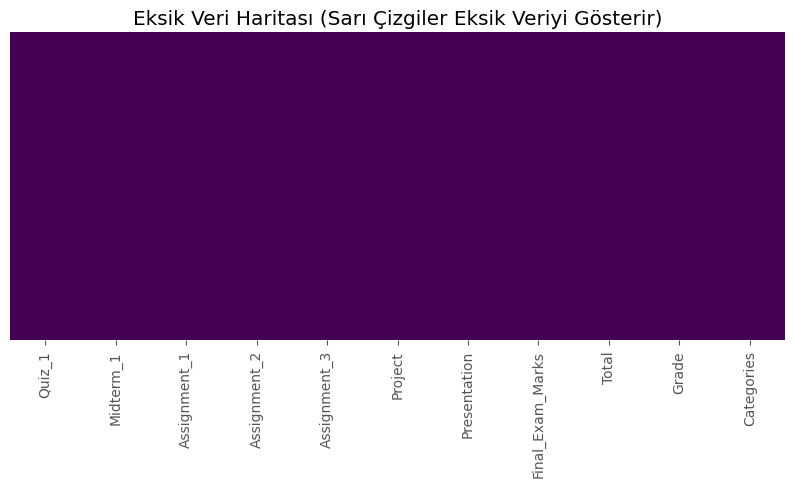

In [6]:
eksik_veri = df.isnull().sum()
print("Sütunlardaki Eksik Veri Sayıları:\n")
print(eksik_veri)


plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Eksik Veri Haritası (Sarı Çizgiler Eksik Veriyi Gösterir)')
plt.show()

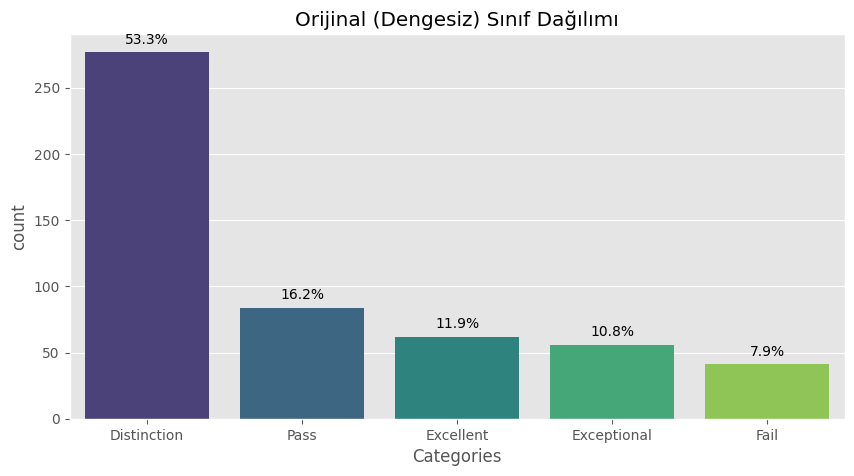

In [7]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Categories', data=df, palette='viridis', order=df['Categories'].value_counts().index)
plt.title('Orijinal (Dengesiz) Sınıf Dağılımı')

# Yüzdeleri ekleyelim
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

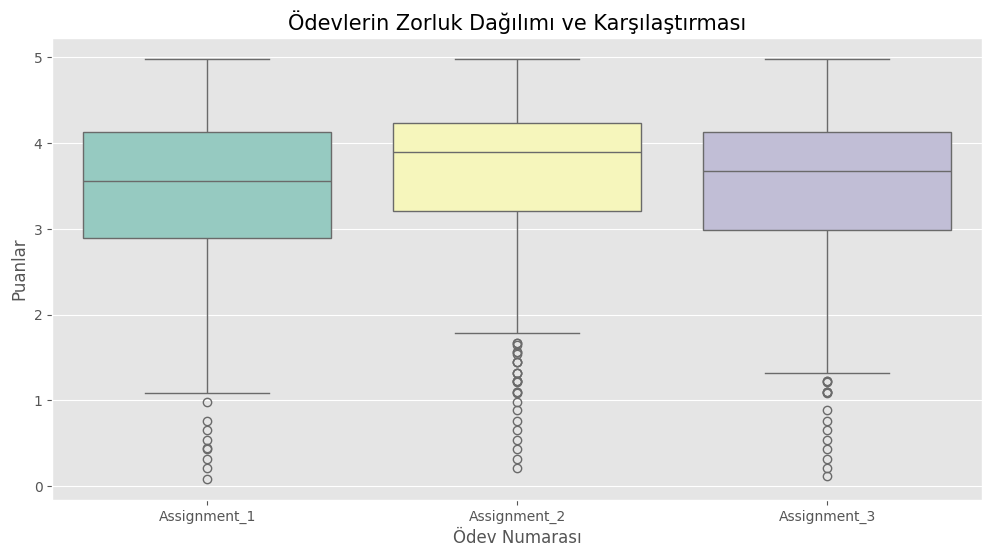

In [8]:
# 2. Sadece Ödev Sütunlarını Seç
assignments = df[['Assignment_1', 'Assignment_2', 'Assignment_3']]

# 3. Grafik Ayarları
plt.figure(figsize=(12, 6))

# Veriyi Seaborn için uygun formata (uzun format) çeviriyoruz
df_melted_assign = assignments.melt(var_name='Ödevler', value_name='Puan')

# 4. Boxplot (Kutu Grafiği) Çizimi
sns.boxplot(x='Ödevler', y='Puan', data=df_melted_assign, palette="Set3")

# Başlık ve Eksen İsimleri
plt.title('Ödevlerin Zorluk Dağılımı ve Karşılaştırması', fontsize=15)
plt.xlabel('Ödev Numarası', fontsize=12)
plt.ylabel('Puanlar', fontsize=12)

# Grafiği Göster
plt.show()

Text(0.5, 1.0, 'Başarı Kategorilerine Göre Vize Notu Dağılımları (Yoğunluk)')

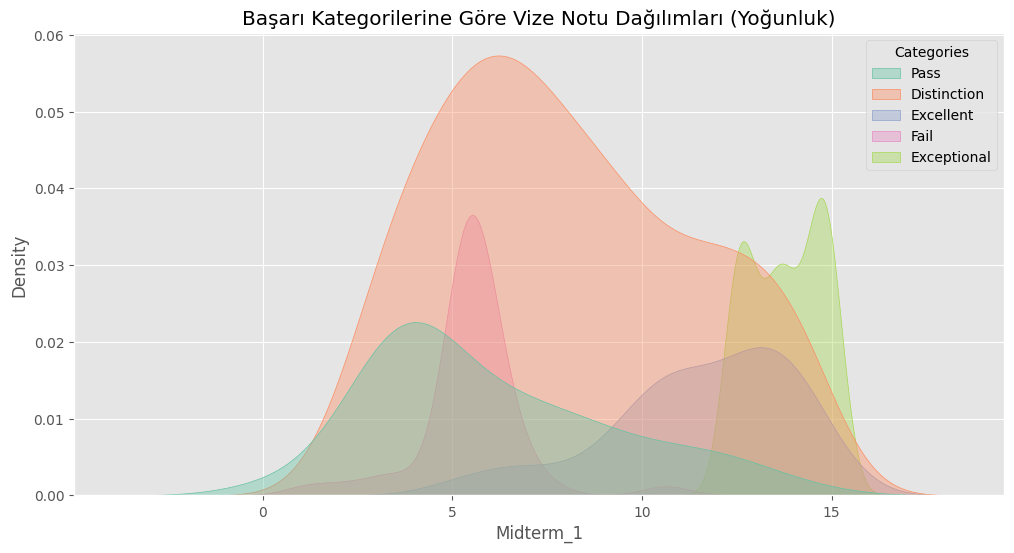

In [9]:
plt.figure(figsize=(12, 6))

# 'fill=True' alanın altını boyar, 'alpha' saydamlığı ayarlar

sns.kdeplot(data=df, x='Midterm_1', hue='Categories', palette='Set2', fill=True, alpha=0.4)

plt.title('Başarı Kategorilerine Göre Vize Notu Dağılımları (Yoğunluk)')

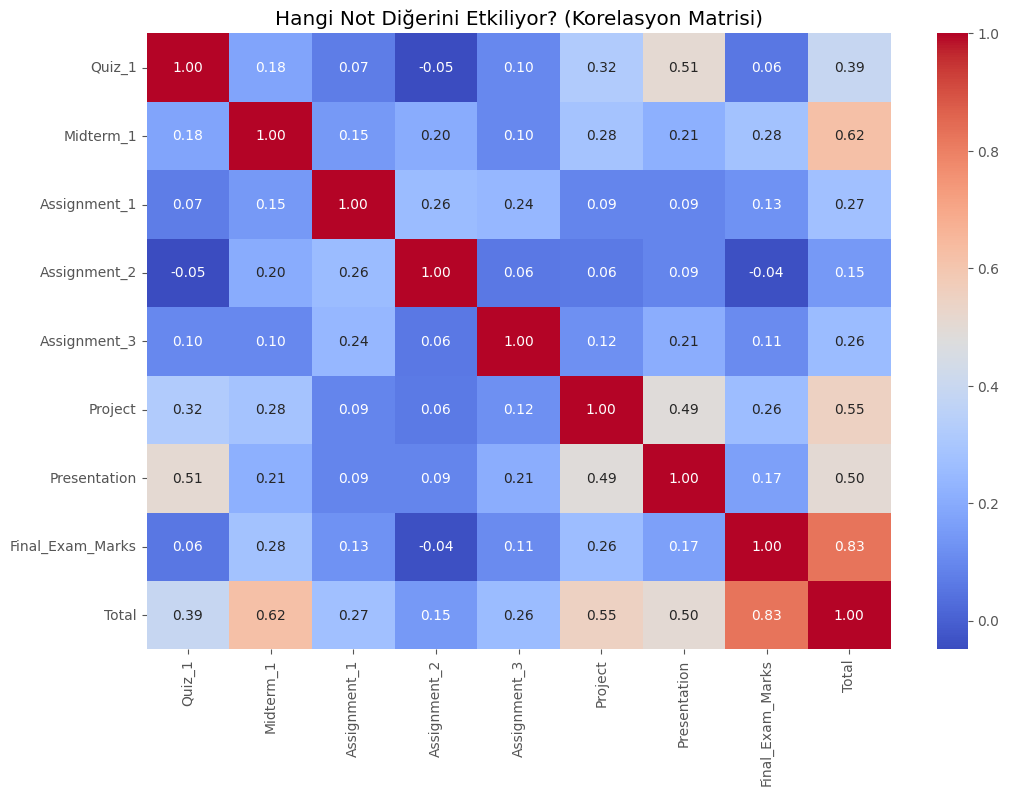

In [10]:
# 1. KORELASYON ANALİZİ
plt.figure(figsize=(12, 8))
# Sadece sayısal sütunları seçiyoruz
numeric_df = df.select_dtypes(include=['float64', 'int64'])
if 'Student Id' in numeric_df.columns: numeric_df = numeric_df.drop('Student Id', axis=1) # ID gereksiz

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Hangi Not Diğerini Etkiliyor? (Korelasyon Matrisi)')
plt.show()

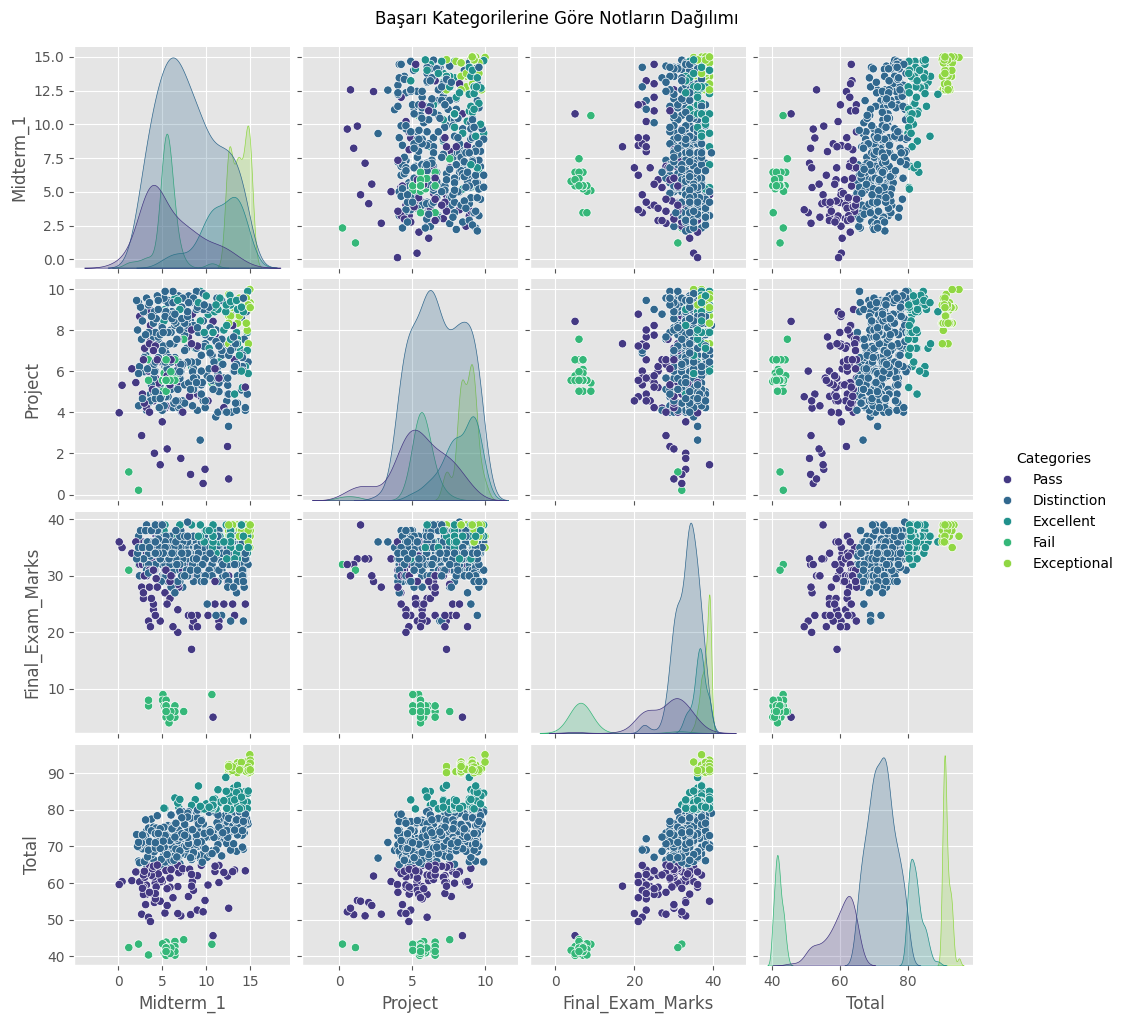

In [11]:
# 2. DETAYLI DAĞILIM ANALİZİ (PAIRPLOT)
# Sadece önemli ana değişkenleri seçerek karmaşayı önleyelim
cols = ['Midterm_1', 'Project', 'Final_Exam_Marks', 'Total']
sns.pairplot(df, vars=cols, hue='Categories', palette='viridis', diag_kind='kde')
plt.suptitle('Başarı Kategorilerine Göre Notların Dağılımı', y=1.02)
plt.show()

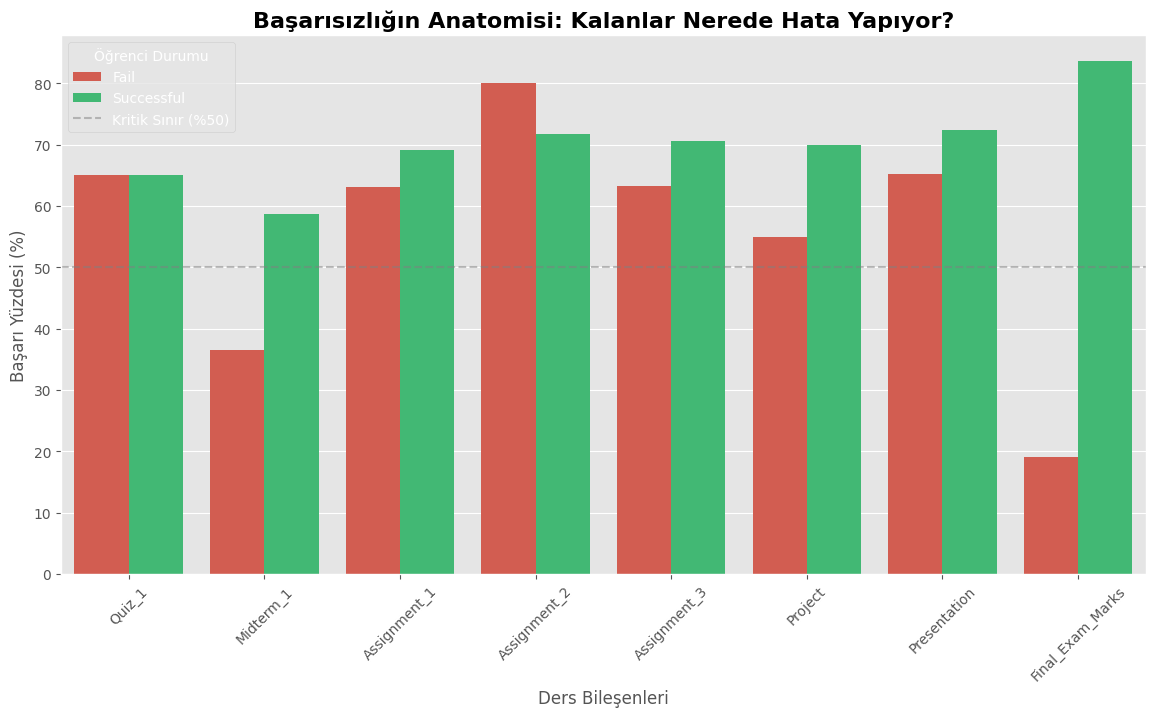

In [12]:
# 2. Ders Bileşenleri ve Tahmini Maksimum Puanları
# (Notları %100'lük sisteme çevirmek için)
components = ['Quiz_1', 'Midterm_1', 'Assignment_1', 'Assignment_2', 'Assignment_3', 'Project', 'Presentation', 'Final_Exam_Marks']
max_scores = {
    'Quiz_1': 10, 'Midterm_1': 15, 
    'Assignment_1': 5, 'Assignment_2': 5, 'Assignment_3': 5, 
    'Project': 10, 'Presentation': 10, 'Final_Exam_Marks': 40
}

# 3. Öğrencileri Grupla: Kalanlar (Fail) vs Geçenler (Successful)
df['Status'] = df['Categories'].apply(lambda x: 'Fail' if x == 'Fail' else 'Successful')

# 4. Ortalamaları Al ve Yüzdeye (%) Çevir
# (Her notu kendi max puanına bölüp 100 ile çarpıyoruz)
grouped_means = df.groupby('Status')[components].mean()
normalized_means = grouped_means.copy()
for col in components:
    normalized_means[col] = (grouped_means[col] / max_scores[col]) * 100

# 5. Görselleştirme (Bar Plot)
plt.figure(figsize=(14, 7))

# Veriyi çizim formatına getir
df_plot = normalized_means.reset_index().melt(id_vars='Status', var_name='Component', value_name='Success_Rate')

# Çizim
sns.barplot(
    x='Component', 
    y='Success_Rate', 
    hue='Status',
    data=df_plot, 
    palette={'Successful': '#2ecc71', 'Fail': '#e74c3c'} # Yeşil ve Kırmızı
)

# Süslemeler
plt.title('Başarısızlığın Anatomisi: Kalanlar Nerede Hata Yapıyor?', fontsize=16, fontweight='bold')
plt.ylabel('Başarı Yüzdesi (%)', fontsize=12)
plt.xlabel('Ders Bileşenleri', fontsize=12)
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Kritik Sınır (%50)')
# Legend (Açıklama Kutusu) Ayarları
legend = plt.legend(title='Öğrenci Durumu')
plt.setp(legend.get_title(), color='white') # Başlık rengi
for text in legend.get_texts(): # İçerik rengi
    text.set_color("white")
plt.xticks(rotation=45)

plt.show()